**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
from types import SimpleNamespace
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from examproject import examproject
model = examproject()

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [3]:
sol = SimpleNamespace()
# Preference
alfa = 0.5
kappa = 1
v = 1/(2*16**2)
w = 1
tau = 0.3

# Utility function
def utility(labour, gov):
    wbar = (1-tau)*w
    con = kappa+wbar*labour
    return (np.log((con**alfa)*(gov**(1-alfa)))-v*(labour**2/2))

# Solving the optimization problem
def solve(sol):
    objective_function = lambda x: -utility(x[0],x[1])
    x0= [12.01, 1.5]
    bounds = [(0.001, 24.0),(0.9999, 2.001)]
    solution = optimize.minimize(objective_function, x0, method='Nelder-Mead', bounds=bounds)
    sol.labour = solution.x[0]
    sol.gov = solution.x[1]
    return sol

sol = solve(sol) # Calling the solve() function to find the optimal solution
print(f"With a government spending of {sol.gov:.1f} the worker will choose to work {sol.labour:.1f} hours")

With a government spending of 2.0 the worker will choose to work 15.3 hours


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

With a wage of 0.00, a government spending of 2.0, the worker will choose to work 0.0 hours.
With a wage of 0.05, a government spending of 2.0, the worker will choose to work 7.2 hours.
...
With a wage of 1.95, a government spending of 2.0, the worker will choose to work 15.6 hours.
With a wage of 2.00, a government spending of 2.0, the worker will choose to work 15.6 hours.


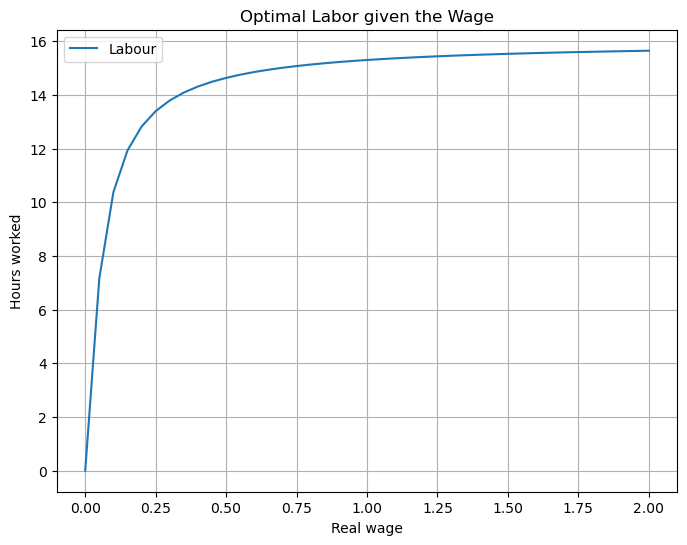

In [4]:
res = SimpleNamespace()
w_vec = np.linspace(0.0,2,41)
res.labour = []
res.gov = []


# Solving for optimal labor and government spending
for w in w_vec:
    solve(sol)
    res.labour.append(sol.labour)
    res.gov.append(sol.gov)
# Printing results for specific wage values
for i in range(len(w_vec)):
    w = w_vec[i]
    if i < 2 or i >= len(w_vec) - 2:
        print(f"With a wage of {w:.2f}, a government spending of {res.gov[i]:.1f}, the worker will choose to work {res.labour[i]:.1f} hours.")
    elif i == 2:
        print("...")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(w_vec, res.labour, label='Labour')
plt.xlabel('Real wage')
plt.ylabel('Hours worked')
plt.title('Optimal Labor given the Wage')
plt.legend()
plt.grid(True)

The plot depicted above showcases the relationship between the optimal labor supply choice $L^{\star}(\tilde{w})$, and the real wage $w$. It is evident that as the real wage rises, the optimal labor supply also increases. However, this increase follows a pattern of diminishing marginal utility.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


C:\Users\Jonathan Høgh Hansen\AppData\Local\Temp\ipykernel_17312\2641649844.py:13: RuntimeWarning: invalid value encountered in double_scalars
  labourstar = (-kappa + np.sqrt(kappa**2 + 4 * alfa / v * wbar**2)) / (2 * wbar)


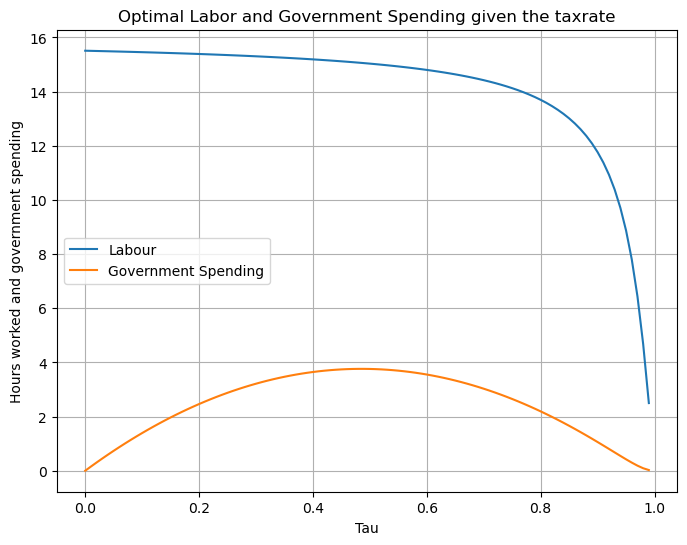

In [5]:
res = SimpleNamespace()
tau_vec = np.linspace(0.0,1,101)
res.labour = []
res.gov = []
alfa = 0.5
kappa = 1
v = 1/(2*16**2)
w = 1

# Calculating optimal labor and government spending for each tax rate
for tau in tau_vec:
    wbar = (1 - tau) * w
    labourstar = (-kappa + np.sqrt(kappa**2 + 4 * alfa / v * wbar**2)) / (2 * wbar)
    res.labour.append(labourstar)
    govtspending = tau * w * labourstar * ((1 - tau) * w)
    res.gov.append(govtspending)
    
    
    
#Plot the results
plt.figure(figsize=(8, 6))
plt.plot(tau_vec, res.labour, label='Labour')
plt.plot(tau_vec, res.gov, label='Government Spending')
plt.xlabel('Tau')
plt.ylabel('Hours worked and government spending')
plt.title('Optimal Labor and Government Spending given the taxrate')
plt.legend()
plt.grid(True)


The plot above illustrates two relationships: the relationship between labor supply choice and taxes, as well as the connection between government spending and taxes. It is observed that government spending rises alongside an increase in taxes, up until the point where taxes reach 50 percent. Beyond this threshold, government spending starts to decline as taxes continue to increase. This is attributed to a decrease in the total amount of taxes collected once the tax level surpasses 50 percent. Additionally, as taxes increase, there is a decrease in labor supply.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

C:\Users\Jonathan Høgh Hansen\AppData\Local\Temp\ipykernel_17312\2523673131.py:11: RuntimeWarning: divide by zero encountered in log
  return (np.log((con**alfa)*(govtfunc(labour, tau)**(1-alfa)))-v*(labour**2/2))


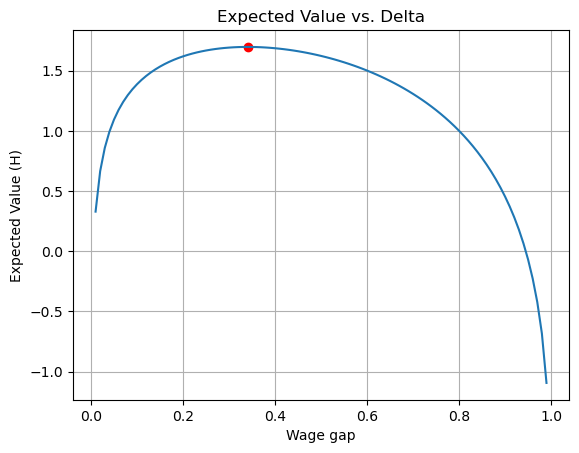

The social optimal tax rate is 34.06%


In [20]:
sol = SimpleNamespace()
alfa = 0.5
kappa = 1
v = 1/(2*16**2)
w = 1

# Define the utility function
def utility(labour, tau):
    wbar = (1-tau)*w
    con = kappa+wbar*labour
    return (np.log((con**alfa)*(govtfunc(labour, tau)**(1-alfa)))-v*(labour**2/2))


# Define the government function
def govtfunc(labour , tau):
    return tau * w * labour * ((1 - tau) * w)

# Solve for optimal tau and labour
def solvetau(sol):
    objective_function = lambda x: -utility(x[0],x[1])
    x0= [12.01, 0.5]
    bounds = [(0.001, 24.0),(0.0001, 1.001)]
    solution = optimize.minimize(objective_function, x0, method='Nelder-Mead', bounds=bounds)
    sol.labour = solution.x[0]
    sol.tau = solution.x[1]
    return sol

# Generate tau values
tau_vec = np.linspace(0,1,101)
labour_vec=[]

# Calculate expected values for different tau values
for tau in tau_vec:
    objective_function = lambda x: -utility(x[0], tau)
    x0= [12.01]
    bounds = [(0.001, 24.0)]
    solution = optimize.minimize(objective_function, x0, method='Nelder-Mead', bounds=bounds)
    res = solution.x[0]
    opt = utility(res, tau)
    labour_vec.append(opt)

# Find the optimal tau
sol = solvetau(sol)
tau_opt = sol.tau

# Plotting the results
plt.plot(tau_vec, labour_vec)
plt.xlabel('Wage gap')
plt.ylabel('Expected Value (H)')
plt.title('Expected Value vs. Delta')
plt.grid(True)

# Add vertical line at delta = 0.18
plt.scatter(tau_opt, utility(sol.labour, tau_opt), color='r')

plt.show()

# Print the social optimal tax rate
print(f"The social optimal tax rate is {100 * tau_opt:.2f}%")

Based on the plot and the calculated solution, we determine that the socially optimal tax rate maximizing worker utillity is 34.06 pct. (0.3406).






A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [7]:
sol = SimpleNamespace()

# Preferences
alfa = 0.5
kappa = 1
v = 1/(2*16**2)
w = 1
epsilon = 1
rho = 1.001
sigma = 1.001
tau = 0.3406
govtspen = 1
def utility(labour):
    con = kappa + (1 - tau) * w * labour
    inner = (alfa * con**((sigma - 1) / sigma) + (1 - alfa) * govtspen**((sigma - 1) / sigma))**(sigma / (sigma-1))
    return (((inner**(1 - rho)) - 1) / (1 - rho)) - v * ((labour**(1 + epsilon)) / (1 + epsilon))

def govtfunc(labour):
    return tau * w * labour * ((1 - tau) * w)


def solve5(sol):
    objective_function = lambda x: -utility(x[0])
    x0 = [10.01]
    bounds = [(0.001, 24.0)]
    solution = optimize.minimize(objective_function, x0, method='Nelder-Mead', bounds=bounds)
    sol.labour = solution.x[0]
    return sol

solve5(sol)
labour1 = sol.labour
govtspen1 = govtfunc(sol.labour)

print(f"With {labour1:.2f} hours worked the government will spend {govtspen1:.2f}")

epsilon = 1
rho = 1.5
sigma = 1.5

solve5(sol)
labour2 = sol.labour
govtspen2 = govtfunc(sol.labour)
print(f"With {labour2:.2f} hours worked the government will spend {govtspen2:.2f}")

With 15.26 hours worked the government will spend 3.43
With 12.66 hours worked the government will spend 2.84


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [8]:
opt = SimpleNamespace()
def utility(labour, tau):
    con = kappa + (1 - tau) * w * labour
    inner = (alfa * con**((sigma - 1) / sigma) + (1 - alfa) * govtfunc(labour, tau)**((sigma - 1) / sigma))**(sigma / (sigma-1))
    return (((inner**(1 - rho)) - 1) / (1 - rho)) - v * ((labour**(1 + epsilon)) / (1 + epsilon))

def govtfunc(labour , tau):
    return tau * w * labour * ((1 - tau) * w)

def solve6(opt):
    objective_function = lambda x: -utility(x[0],x[1])
    x0 = [12.5, 0.5]
    bounds = [(0.001,24.0), (0.001, 1.0)]
    solution = optimize.minimize(objective_function, x0, method='Nelder-Mead', bounds=bounds)
    opt.labour = solution.x[0]
    opt.tau = solution.x[1]
    return opt

alfa = 0.5
kappa = 1
v = 1/(2*16**2)
w = 1
epsilon = 1
rho = 1.001
sigma = 1.001
solve6(opt)
tau_opt1 = opt.tau
print(f"{100*tau_opt1:.2f}")


epsilon = 1
rho = 1.5
sigma = 1.5
solve6(opt)
tau_opt2 = opt.tau
print(f"{100*tau_opt2:.2f}")

34.05
29.31


From set 1 we find that the socially optimal tax rate is 34.05 percent and from set 2 we find that the socially optimal tax rate is 29.31 percent.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [9]:
sol = SimpleNamespace()
# Preference
kappa_neg1 = 1
w = 1
eta = 0.5
labour = 1

def profit(kappa_neg1,labour):
    return (kappa_neg1*labour**(1-eta)-w*labour)

objective_function = lambda x: -profit(x[0],x[1])
x0= [1.5, 10.01]
bounds = [(0.9999, 2.001), (0.001, 1000.1)]
solution = optimize.minimize(objective_function, x0, method='Nelder-Mead', bounds=bounds)
sol.kappa = solution.x[0]
sol.labour = solution.x[1]
print(f"With a kappa of {sol.kappa:.1f} we want to hire {sol.labour:.1f} hairdressors in equilibrium. By using the mathematically solution we get the same result.")



With a kappa of 2.0 we want to hire 1.0 hairdressors in equilibrium. By using the mathematically solution we get the same result.


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [10]:
def calculate_expected_value(rho, iota, sigma_epsilon, R, T, K, eta, w, delta,mode):
    # Generate the random shock series
    np.random.seed(0)  # Set a seed for reproducibility
    epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, T))

    h_values = []

    def labour(kappa, ell, t):
        ell[t] = ((1 - eta) * kappa[t] / w) ** (1 / eta)
    
    def labournew(kappa, ell, t, delta):
        ellstar = ((1 - eta) * kappa[t] / w) ** (1 / eta)
        if abs(ell[t - 1] - ellstar) > delta:
            ell[t] = ellstar
        else:
            ell[t] = ell[t - 1]

    for k in range(K):
        kappa = np.zeros(T)
        ell = np.zeros(T)
        h = 0

        # Set initial conditions
        kappa[0] = 1
        ell[0] = 0

        # Calculate kappa using the AR(1) process
        for t in range(1, T):
            kappa[t] = np.exp(rho * np.log(kappa[t - 1]) + epsilon[k, t])

        # Calculate ell[t] for each time period t
        for t in range(T):
            if mode==True:
                labour(kappa, ell, t)
            elif mode==False:
                labournew(kappa, ell, t, delta)

        # Calculate h for the shock series
        for t in range(T):
            if ell[t] != ell[t - 1]:
                h += R ** (-t) * (kappa[t] * ell[t] ** (1 - eta) - w * ell[t]-1*iota)

        h_values.append(h)

    # Calculate the ex ante expected value
    H = np.mean(h_values)

    return H


# Define the parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
delta= 0.05

# Define the planning horizon
T = 120

# Initialize the variables
K = 1000  # Number of shock series to average over

# Additional parameters
eta = 0.5  # The value of eta from question 1
w = 1.0  # The value of w from question 1

# Calculate the ex ante expected value using the function
H = calculate_expected_value(rho, iota, sigma_epsilon, R, T, K, eta, w, delta,mode=True)
print(f"{H:.2f}")



27.81


We have set the value of K to 1000, and this choice does not adversely affect our results.

After maximizing profitability for the given policy, we find that the hairdressers value of H=27,81.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [11]:
H = calculate_expected_value(rho, iota, sigma_epsilon, R, T, K, eta, w, delta,mode=False)
print(f"{H:.2f}")
        

11.65


When implementing the new policy, we observe that the value of the hairdresser decreases to 11.65, indicating a reduction compared to the previous scenario without the policy.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

[27.80527536696047, 19.809992982441305, 13.842340661482096, 9.862014822480393, 7.246113322257921, 5.522279989393676, 4.3257905307404805, 3.4410309884782473, 2.743804646661296, 2.22729309093799, 1.8272980771615634, 1.5666368685184784, 1.3542380389361792, 1.1322588702026029, 0.9769098082857193, 0.8656919593047948, 0.7714800896742038, 0.7058158191504345, 0.641740418563576, 0.5883850764345969, 0.5579981045345822, 0.5266081268331148, 0.49860984900435745, 0.46968962835123435, 0.44601119850788634, 0.4192996053794367, 0.39230106645548074, 0.3699970744016474, 0.34841969607633655, 0.32535797637689334, 0.3037284814819205, 0.2802755156756086, 0.256744139803351, 0.24108368904310246, 0.22268469232995616, 0.20703639927260167, 0.1872244544639783, 0.16877801426745748, 0.151210977174358, 0.13509088975341546, 0.1198154617561101, 0.10399508115889863, 0.09242867243725385, 0.08004519542959339, 0.0728012266433666, 0.06334529574527337, 0.05528092634239269, 0.05167895758995231, 0.04549947849711319, 0.041601477

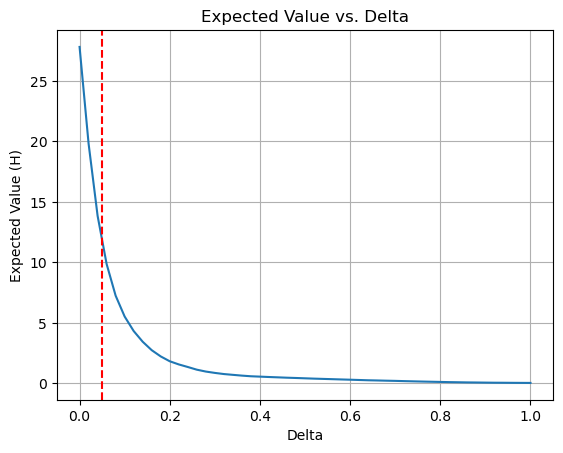

The optimal value of delta is 0.00 with an expected value of H=27.81


In [12]:
delta_vec = np.linspace(0,1,51)
H_vec=[]
for delta in delta_vec:
    H = calculate_expected_value(rho, iota, sigma_epsilon, R, T, K, eta, w, delta,mode=False)
    H_vec.append(H)

print(H_vec)
# Plotting the results
plt.plot(delta_vec, H_vec)
plt.xlabel('Delta')
plt.ylabel('Expected Value (H)')
plt.title('Expected Value vs. Delta')
plt.grid(True)

# Add vertical line at delta = 0.05
plt.axvline(x=0.05, color='r', linestyle='--')

plt.show()

# Set the range of delta values to test
delta_range = np.linspace(0, 1, 20)

best_H = float("-inf")
best_delta = None

# Iterate over each delta value and find the best H
for delta in delta_range:
    H = calculate_expected_value(rho, iota, sigma_epsilon, R, T, K, eta, w, delta, mode=True)
    if H > best_H:
        best_H = H
        best_delta = delta

print(f"The optimal value of delta is {best_delta:.2f} with an expected value of H={best_H:.2f}")
    

We find the optimal value of delta to be zero and the maximized value is 27,81 for the hairdresser. This is also showed in the graph above and we see that a higher delta result in a lower value of the hairdresser. 


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



Empirical evidence shows that a part of the population receives a relatively lower income and it can therefore be cost saving to hire these people. The owner of the hairsalon implement a corporate policy to only hire the relatively cheaper hairdressors. Danmarks Statistik find this pay gap to be 18% in 2020 which would increase the value of the salon from 27,8 to 34,16.

[27.80527536696047, 19.809992982441305, 13.842340661482096, 9.862014822480393, 7.246113322257921, 5.522279989393676, 4.3257905307404805, 3.4410309884782473, 2.743804646661296, 2.22729309093799, 1.8272980771615634, 1.5666368685184784, 1.3542380389361792, 1.1322588702026029, 0.9769098082857193, 0.8656919593047948, 0.7714800896742038, 0.7058158191504345, 0.641740418563576, 0.5883850764345969, 0.5579981045345822, 0.5266081268331148, 0.49860984900435745, 0.46968962835123435, 0.44601119850788634, 0.4192996053794367, 0.39230106645548074, 0.3699970744016474, 0.34841969607633655, 0.32535797637689334, 0.3037284814819205, 0.2802755156756086, 0.256744139803351, 0.24108368904310246, 0.22268469232995616, 0.20703639927260167, 0.1872244544639783, 0.16877801426745748, 0.151210977174358, 0.13509088975341546, 0.1198154617561101, 0.10399508115889863, 0.09242867243725385, 0.08004519542959339, 0.0728012266433666, 0.06334529574527337, 0.05528092634239269, 0.05167895758995231, 0.04549947849711319, 0.041601477

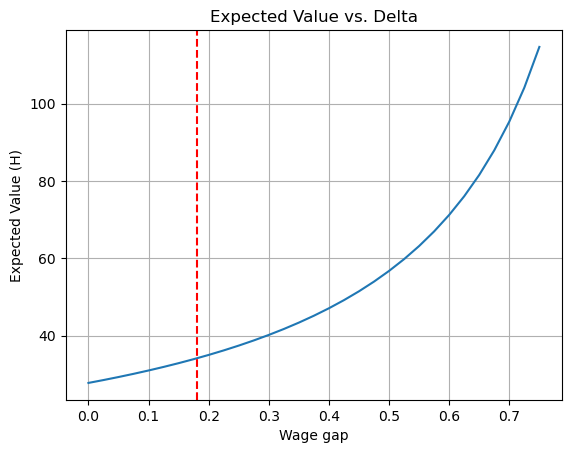

In [13]:
wgap_vec = np.linspace(0,0.75,31)
H_vec2=[]

for wgap in wgap_vec:
    w=1*(1-wgap)
    H = calculate_expected_value(rho, iota, sigma_epsilon, R, T, K, eta, w, delta,mode=True)
    H_vec2.append(H)

print(H_vec)
# Plotting the results
plt.plot(wgap_vec, H_vec2)
plt.xlabel('Wage gap')
plt.ylabel('Expected Value (H)')
plt.title('Expected Value vs. Delta')
plt.grid(True)

# Add vertical line at delta = 0.18
plt.axvline(x=0.18, color='r', linestyle='--')

plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [14]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We implement the refined global optimizer with multi-start and illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [15]:
# For reproducibility we set a seed
np.random.seed(78)

# Griewank function
def griewank(x):
    return griewank_(x[0], x[1])

# Griewank function implementation
def griewank_(x1, x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A - B + 1

# Refined global optimizer with multi-start
def refined_global_optimizer(bounds, tol, K_warmup, K_max):
    x_ast = None  # Best solution found so far
    chi = lambda k: 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))  # Scaling factor function
    x0_history = []  # Track the initial guesses
    
    # Iterate from 0 to K_max
    for k in range(K_max):
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)  # Generate random initial guess
        #x0_history.append(x_k)  # Store the initial guess 
        
        if k >= K_warmup:
            # Refined initial guess using the scaling factor and best solution found so far
            x_k0 = chi(k) * x_k + (1 - chi(k)) * x_ast
            x0_history.append(x_k0) 
            res = optimize.minimize(griewank, x_k0, method='BFGS', tol=tol)  # Minimize Griewank function
        else:
            x0_history.append(x_k) 
            res = optimize.minimize(griewank, x_k, method='BFGS', tol=tol)  # Minimize Griewank function
        
        x_k_ast = res.x  # Best solution found in the current iteration
        
        # Update the best solution if the current solution is better
        if x_ast is None or griewank(x_k_ast) < griewank(x_ast):
            x_ast = x_k_ast
        
        # Check termination condition
        if griewank(x_ast) < tol:
            break
    
    return x_ast, x0_history

# Settings
bounds = [-600, 600]  # Bounds for variables x1 and x2
tol = 10e-8  # Tolerance for termination condition
K_warmup = 10  # Number of warm-up iterations
K_max = 1000  # Maximum number of iterations

# Run the optimizer
result, x0_history = refined_global_optimizer(bounds, tol, K_warmup, K_max)

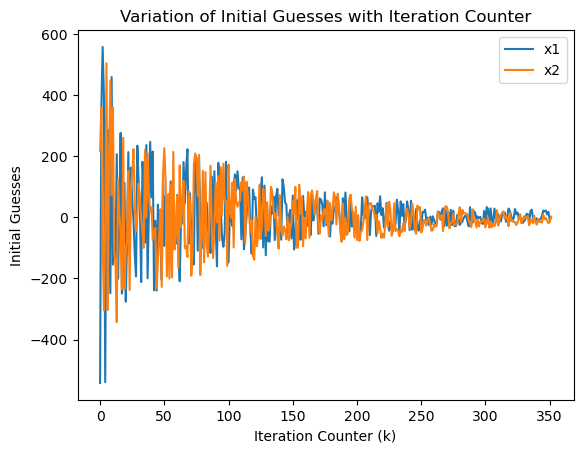

Local minima:  [ 2.91607608e-08 -5.20191627e-08]


In [16]:
# Plot the variation of initial guesses with iteration counter
x0_history = np.array(x0_history)
plt.plot(range(len(x0_history)), x0_history[:, 0], label='x1')
plt.plot(range(len(x0_history)), x0_history[:, 1], label='x2')
plt.xlabel('Iteration Counter (k)')
plt.ylabel('Initial Guesses')
plt.title('Variation of Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

print("Local minima: ", result)

As we implement the refined global optimizer with multi-start, we observe a convergence trend in which the effective initial guesses $\mathbf{x}^{k0}$ progressively approach the global minimum (0,0) with increasing iteration counter $k$. This indicates that the optimization successfully explores the search space and steadily improves its estimates of the optimal local minima.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

We set $\underline{K} = 100$ to check if the convergence is faster:

In [17]:
# Settings
bounds = [-600, 600]  # Bounds for variables x1 and x2
tol = 10e-8  # Tolerance for termination condition
K_warmup = 100  # Number of warm-up iterations
K_max = 1000  # Maximum number of iterations

# Run the optimizer
output = refined_global_optimizer(bounds, tol, K_warmup, K_max)

if len(output) == 2:
    result, x0_history = output
    x_k_ast_history = []  # or assign an appropriate default value
else:
    result, x0_history, x_k_ast_history = output

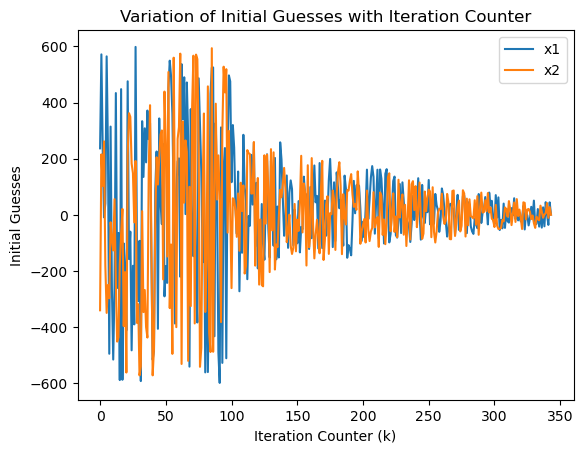

Local minima:  [-1.98191968e-09 -4.08885576e-10]


In [18]:
# Plot the variation of initial guesses with iteration counter
x0_history = np.array(x0_history)
plt.plot(range(len(x0_history)), x0_history[:, 0], label='x1')
plt.plot(range(len(x0_history)), x0_history[:, 1], label='x2')
plt.xlabel('Iteration Counter (k)')
plt.ylabel('Initial Guesses')
plt.title('Variation of Initial Guesses with Iteration Counter')
plt.legend()
plt.show()

print("Local minima: ", result)

When we set $\underline{K} = 100$, we observe that the convergence towards the global minimum becomes slower. This is evident when visually comparing the two plots. Therefore, it is not preferable to choose $\underline{K} = 100$ over $\underline{K} = 10$ because the convergence appears to be significantly slower.